# 5. Deep Learning for Computer Vision

## Visualising what Convnets Learn

In [1]:
import os

from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Obtaining images
HOME_DIR = os.path.dirname(os.path.abspath('__FILE__'))
WORKSPACE_DIR = os.path.join(HOME_DIR, 'workspace')

train_dir = os.path.join(WORKSPACE_DIR, 'train')
src_dir = os.path.join(WORKSPACE_DIR, 'PetImages')

It's often said that deep-learning models are "black boxes": learning representations that are difficult to extract and present in a human-readable form. This might be true for other models but definitely not for convnets. The representations learnt by convnets are highly able to be visualised mainly because they are <u>representations of visual concepts</u>. Since 2013 there have been many ways to visualise and interpret these representations. Some of the most accessible and useful ones include:

- Visualising intermediate convnet outputs (intermediate activations) - useful for understanding how successive convnet layers transform their input and for getting a first idea of the meaning of individual convnet filters
- Visualising convnet filters - useful for understanding precisely what visual pattern or concept each filter in a convnet is receptive to
- Visualising heatmaps of class activation in an image - useful for understanding which parts of an image were identified as belonging to a given class, thus allowing one you to localize objects in images

### Visualising Intermediate Activations

Visualising intermediate activations consist of displaying the feature maps that are output by various convolution and pooling layers in a network, given a certain input. This gives a view into how an input is decomposed into the different filters learned by the network. You want to visualise feature maps with 3 dimensions: width, height and depth (channels). Each channel encodes relatively independent features, so the proper way to visualise these feature maps is by independently plotting the contents of every channel as a 2D image.

In [3]:
# Load model
model = keras.models.load_model('model_ex2v0__baseline.h5')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Consider a new image of a cat, not part of the images the network was trained on.

(462, 500, 3)
(1, 462, 500, 3)


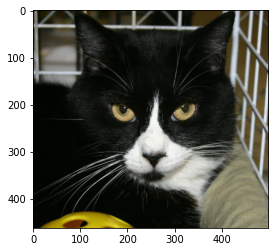

In [13]:
# Read an image to a tensor
img1_path = os.path.join(src_dir, 'Cat', os.listdir(os.path.join(src_dir, 'Cat'))[10005])
img1 = keras.preprocessing.image.load_img(img1_path)
img1_tensor = keras.preprocessing.image.img_to_array(img1)
print(img1_tensor.shape)
# Expand this to a 4D tensor & preprocess image to be fed to the model
img1_tensor = np.expand_dims(img1_tensor, axis=0)
img1_tensor /= 255.
print(img1_tensor.shape)
plt.imshow(img1_tensor[0])
plt.show()

In order to extract the feature maps to look at, we create a Keras model that takes batches of images as input, and outputs the activations of all convlution-pooling layers. 

For this, we use the the `Model` class from Keras. This model is instantiated with two arguments: an input tensor (or list of input tensors) and an output tensor (or list of output tensors). The resulting class is a Keras model, just like the `Sequential` models we did before, mapping the specified inputs to the specified outputs. However, this allows for multiple outputs, unlike the ones we have seen earlier.

In [19]:
# Extract the outputs from the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]
# Create a model that will return these outputs given the model input
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
print(activation_model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0     

Given an (image) input, this model returns the values of the layer activations in the original model. This model has 1 input and 8 outputs: one output per layer activation.

In [37]:
activation = activation_model.predict(img1_tensor)
print(len(activation))

8


(1, 460, 498, 32)


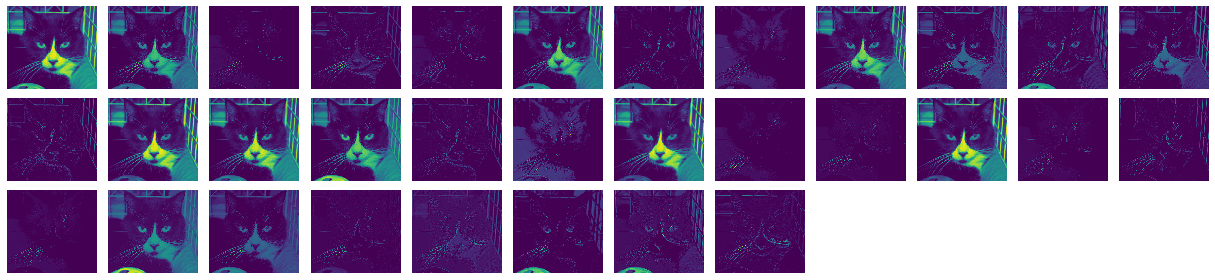

In [42]:
first_layer_activation = activation[0]
print(first_layer_activation.shape)
fig = plt.figure(figsize=(17, 4))
for i in range(first_layer_activation.shape[3]):
    ax = fig.add_subplot(3,12,i+1)
    ax.matshow(first_layer_activation[0,:,:,i], cmap='viridis')
    ax.axis('off')
plt.tight_layout()

(1, 228, 247, 64)


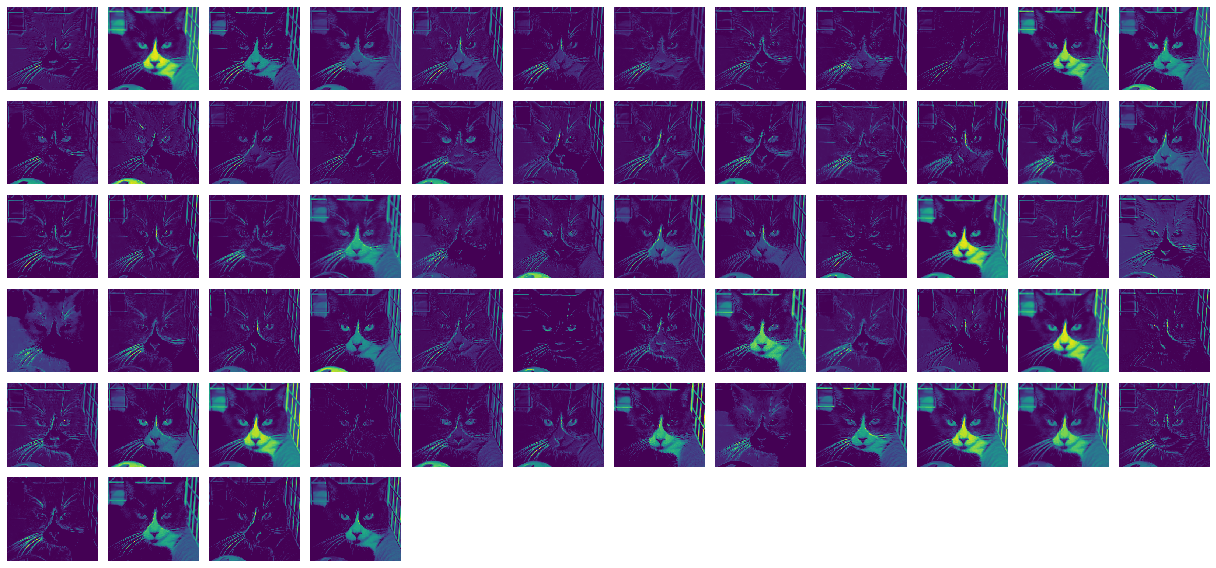

In [43]:
second_layer_activation = activation[2]
print(second_layer_activation.shape)
fig = plt.figure(figsize=(17, 8))
for i in range(second_layer_activation.shape[3]):
    ax = fig.add_subplot(6,12,i+1)
    ax.matshow(second_layer_activation[0,:,:,i], cmap='viridis')
    ax.axis('off')
plt.tight_layout()

(1, 112, 121, 128)


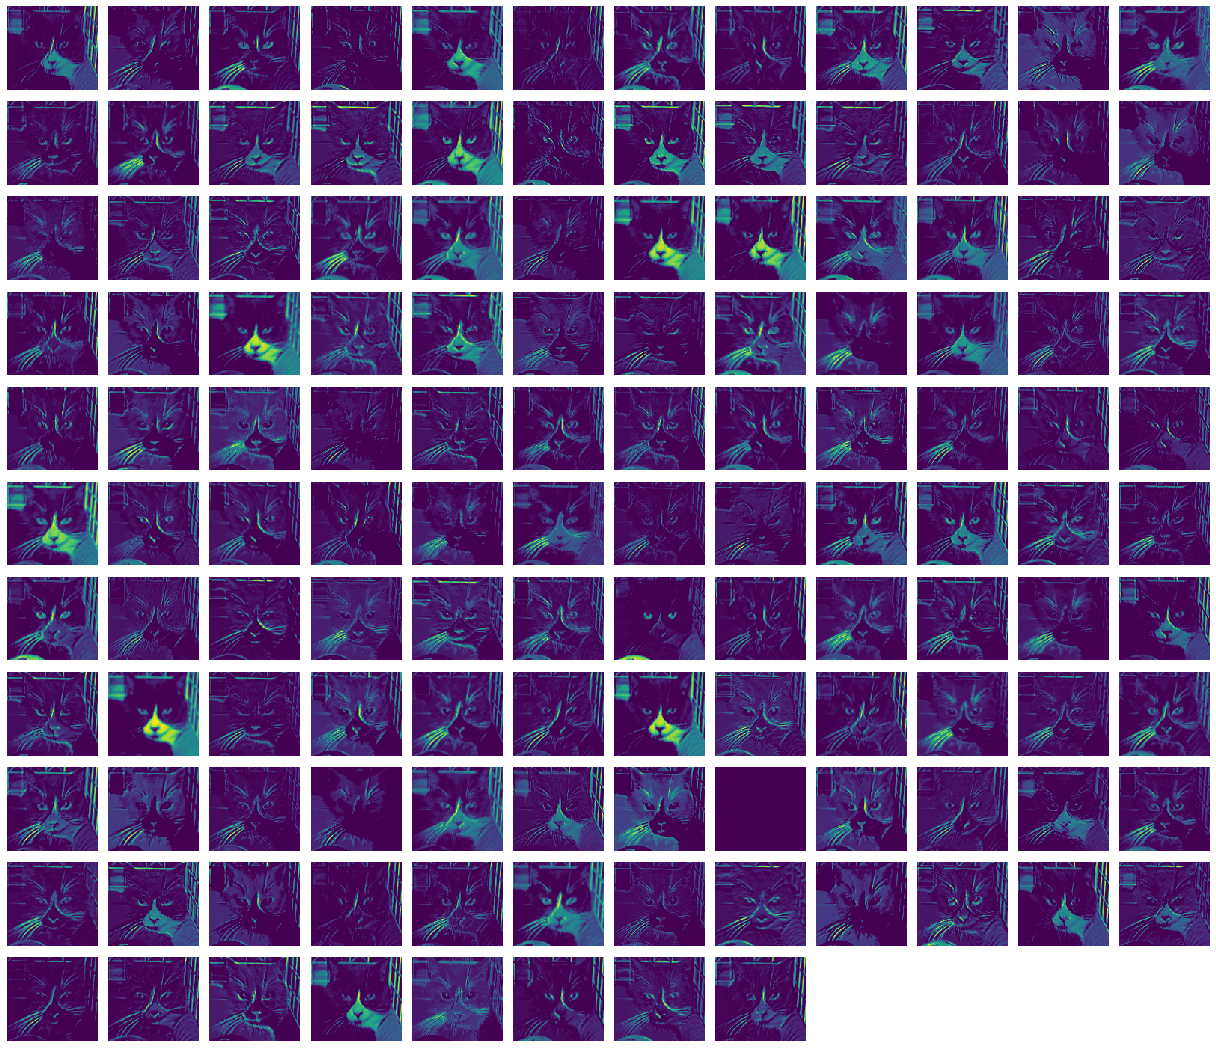

In [45]:
third_layer_activation = activation[4]
print(third_layer_activation.shape)
fig = plt.figure(figsize=(17, 16))
for i in range(third_layer_activation.shape[3]):
    ax = fig.add_subplot(12,12,i+1)
    ax.matshow(third_layer_activation[0,:,:,i], cmap='viridis')
    ax.axis('off')
plt.tight_layout()

(1, 54, 58, 128)


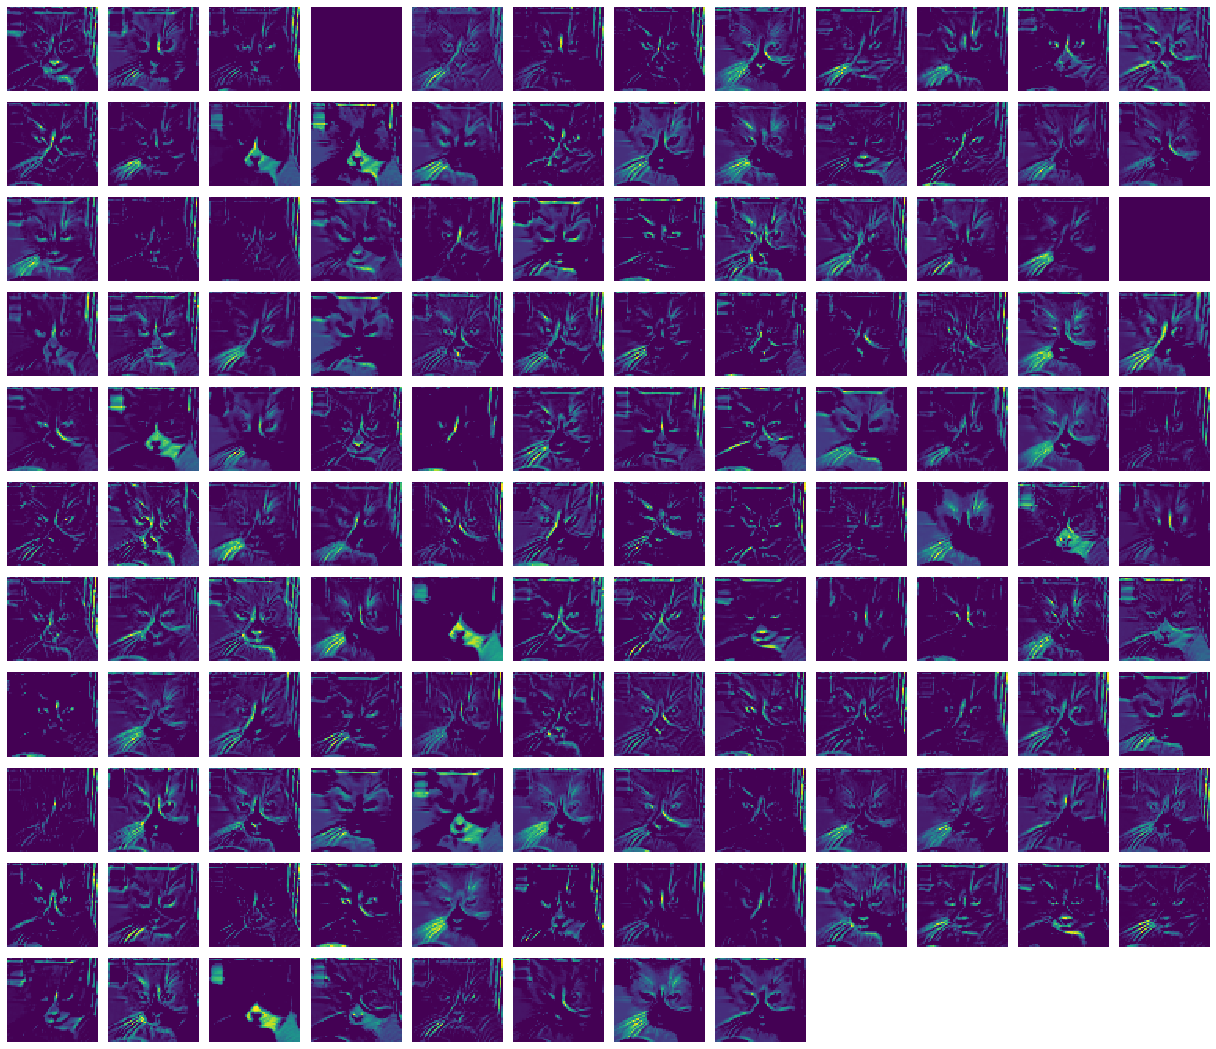

In [46]:
fourth_layer_activation = activation[6]
print(fourth_layer_activation.shape)
fig = plt.figure(figsize=(17, 16))
for i in range(fourth_layer_activation.shape[3]):
    ax = fig.add_subplot(12,12,i+1)
    ax.matshow(fourth_layer_activation[0,:,:,i], cmap='viridis')
    ax.axis('off')
plt.tight_layout()

What can we see from the sequential activations?

- The first layer acts as a collection of various edge detectors. At that stage, the activations retain almost all of the information present in the source picture.
- As we go higher, the activations become increasingly abstract and less visually interpretable. They begin to endode higher-level concepts like "cat eye", "cat nose", "whiskers" etc. Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.
- The sparsity of the activations increases with the depth of the layer. In the first layer, all filters are activated by the input image. But in the following layers, more and more filters are blank. This means the pattern encoded by the filter is not found in the input image.

This is an important universal charactersistic of the representations learnt by deep neural networks: the features extracted by a layer become increasingly abstract with the depth of the layer. The activations of higher layers carry less and less information about the specific input being seen, and more and more information abou thte target.  A deep neurla network effectively acts as an <b>information distillation pipeline</b> with raw datay going in and being repeatedly transformed so that the irrelevant information is being filterd out and useful information is being magnified and refined.

(225, 300, 3)
(1, 225, 300, 3)


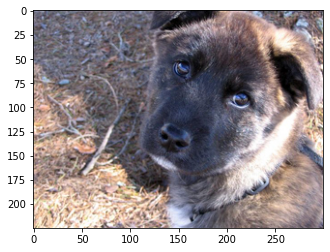

8
(1, 223, 298, 32)
(1, 109, 147, 64)
(1, 52, 71, 128)
(1, 24, 33, 128)


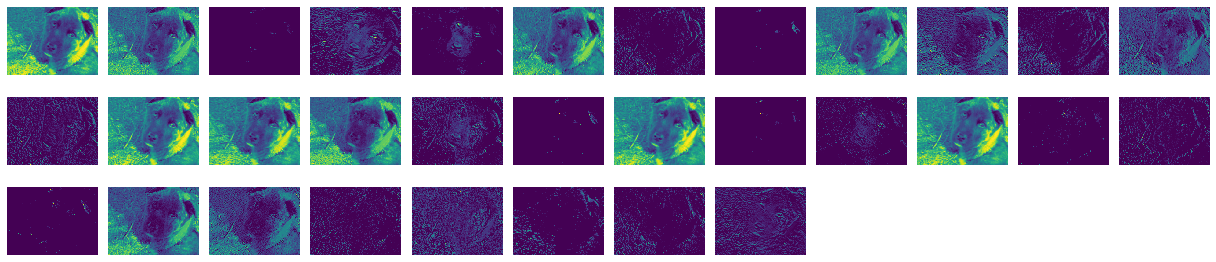

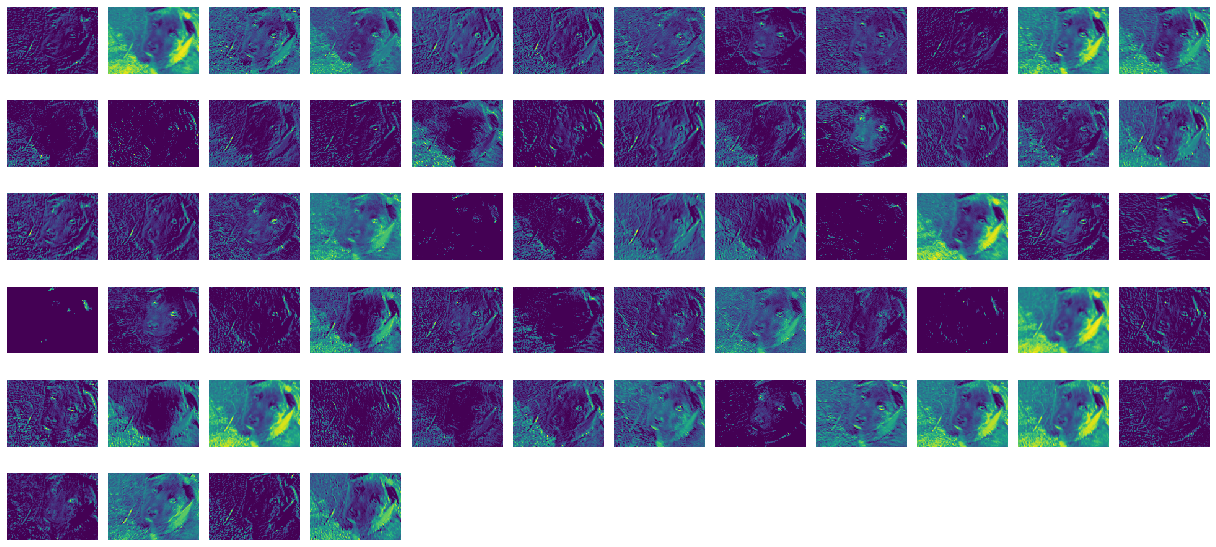

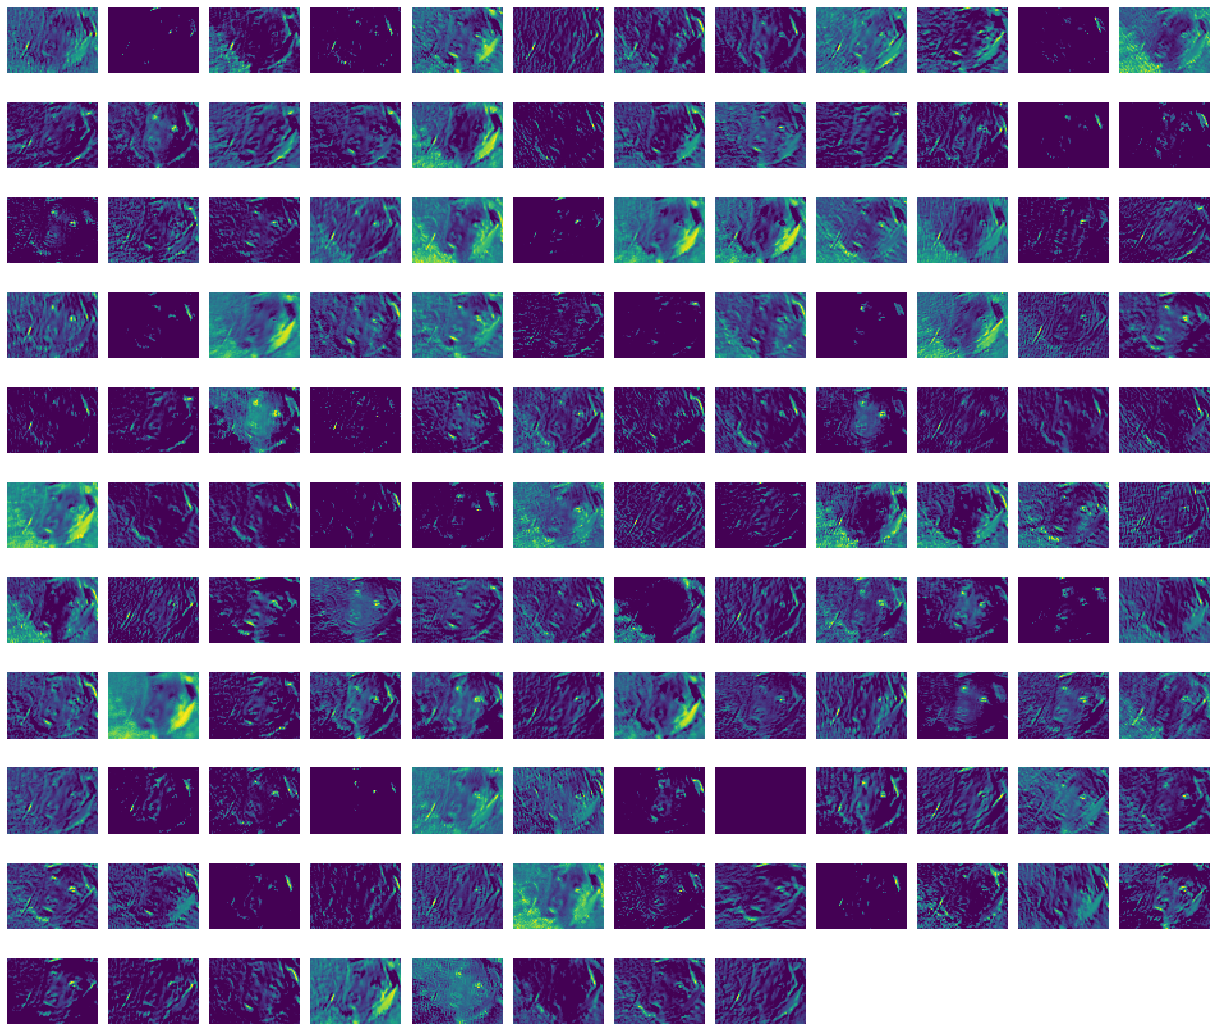

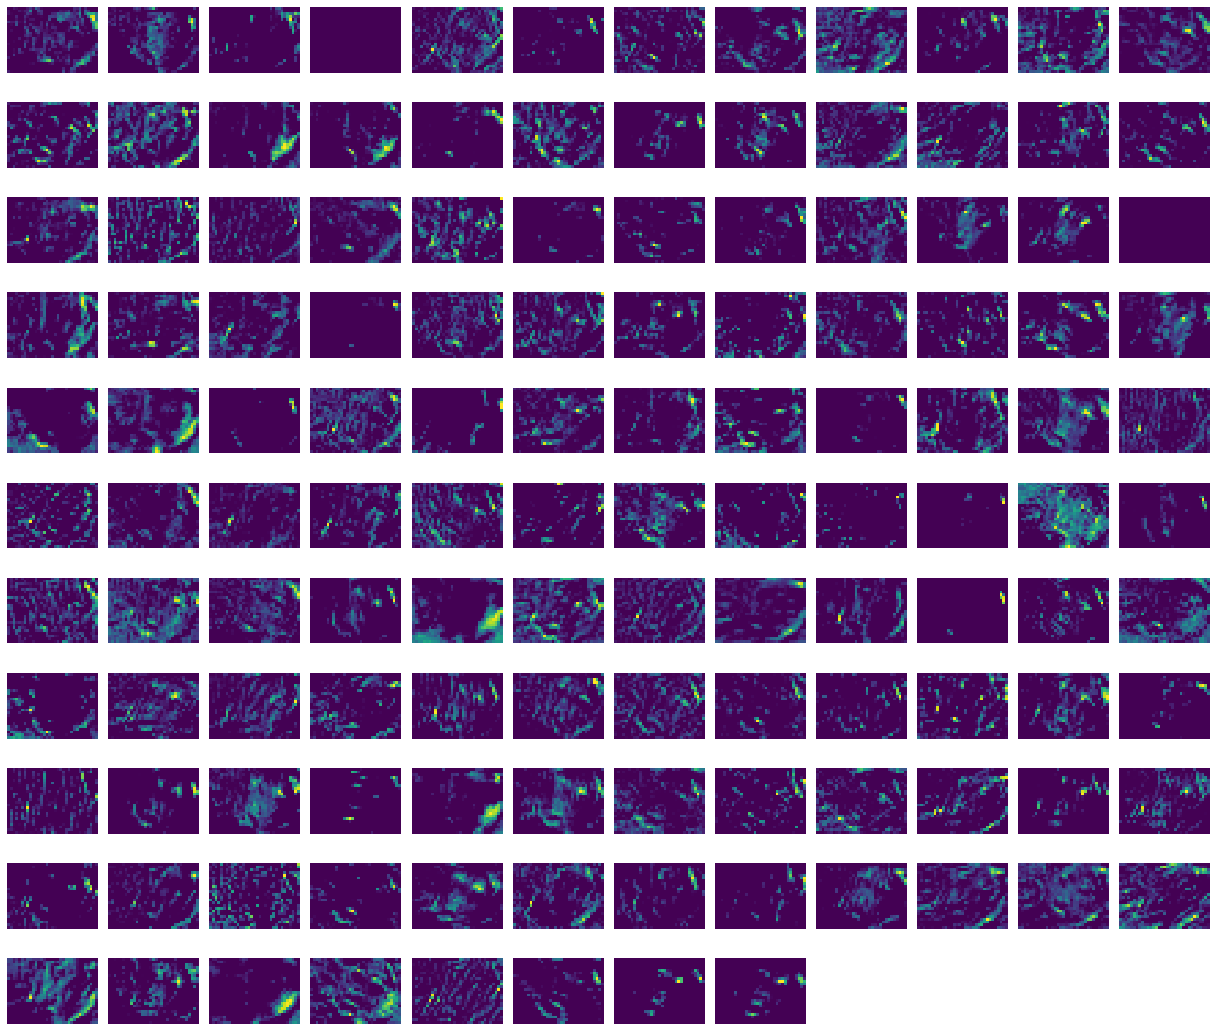

In [51]:
# Example for a dog
img1_path = os.path.join(src_dir, 'Dog', os.listdir(os.path.join(src_dir, 'Dog'))[10007])
img1 = keras.preprocessing.image.load_img(img1_path)
img1_tensor = keras.preprocessing.image.img_to_array(img1)
print(img1_tensor.shape)
# Expand this to a 4D tensor & preprocess image to be fed to the model
img1_tensor = np.expand_dims(img1_tensor, axis=0)
img1_tensor /= 255.
print(img1_tensor.shape)
plt.imshow(img1_tensor[0])
plt.show()

activation = activation_model.predict(img1_tensor)
print(len(activation))

first_layer_activation = activation[0]
print(first_layer_activation.shape)
fig = plt.figure(figsize=(17, 4))
for i in range(first_layer_activation.shape[3]):
    ax = fig.add_subplot(3,12,i+1)
    ax.matshow(first_layer_activation[0,:,:,i], cmap='viridis')
    ax.axis('off')
plt.tight_layout()

second_layer_activation = activation[2]
print(second_layer_activation.shape)
fig = plt.figure(figsize=(17, 8))
for i in range(second_layer_activation.shape[3]):
    ax = fig.add_subplot(6,12,i+1)
    ax.matshow(second_layer_activation[0,:,:,i], cmap='viridis')
    ax.axis('off')
plt.tight_layout()

third_layer_activation = activation[4]
print(third_layer_activation.shape)
fig = plt.figure(figsize=(17, 16))
for i in range(third_layer_activation.shape[3]):
    ax = fig.add_subplot(12,12,i+1)
    ax.matshow(third_layer_activation[0,:,:,i], cmap='viridis')
    ax.axis('off')
plt.tight_layout()

fourth_layer_activation = activation[6]
print(fourth_layer_activation.shape)
fig = plt.figure(figsize=(17, 16))
for i in range(fourth_layer_activation.shape[3]):
    ax = fig.add_subplot(12,12,i+1)
    ax.matshow(fourth_layer_activation[0,:,:,i], cmap='viridis')
    ax.axis('off')
plt.tight_layout()

### Visualising Convnet Filters

Another easy way to inspect the filters learned by convnets is to display the visual pattern that each filter is meant to respond to. This can be done by <u>gradient ascent in input space</u>. Applying gradient descent to the value of the input image of a convnet so as to maximise the response of a specific filter, starting from a blank input image. The resulting image will be the one that the chosen filter is maximally responsive to.

To do so, build a loss function that maximises the value of a given filter in a given convolution layer, then use stochastic gradient descent to adjust the values of the input image.

### Visualising Heatmaps of Class Activation

This technique is called <b>class activation map</b> activation, and it consists of producing heatmaps of class activation over input images. A class activation heatmap is a 2D grid of scores associated with a specific output class, computed for every location in any input image, indicating how important each location is with respect to the class under consideration. CAM visualization allows you to generate a heatmap for the class "cat", indicating how cat-like different parts of the image are and the heatmap for "dogs", indicating how dog-like parts of the image are.